![](https://pandas.pydata.org/_static/pandas_logo.png)

### 简介

`pandas` 是 Python 生态下用于表格数据处理的库，它提供了一个与 R 中的 `DataFrame` 类似的数据结构，以及一系列应用在 `DataFrame` 数据结构上的函数与方法，用于对其进行基本的处理、统计以及可视化操作。

`pandas` 文档有十分详细的[教程](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)，建议阅读。

### 使用示例

这里我们展示一个使用 pandas 处理 [`GFF3`](https://www.ensembl.org/info/website/upload/gff3.html?redirect=no) 格式文件的例子。

GFF3 是一种表格文件(tsv)，它一共有9列是这样定义的：

1. **seqid** - name of the chromosome or scaffold; chromosome names can be given with or without the 'chr' prefix. Important note: the seq ID must be one used within Ensembl, i.e. a standard chromosome name or an Ensembl identifier such as a scaffold ID, without any additional content such as species or assembly. See the example GFF output below.
2. **source** - name of the program that generated this feature, or the data source (database or project name)
3. **type** - type of feature. Must be a term or accession from the SOFA sequence ontology
4. **start** - Start position of the feature, with sequence numbering starting at 1.
5. **end** - End position of the feature, with sequence numbering starting at 1.
6. **score** - A floating point value.
7. **strand** - defined as + (forward) or - (reverse).
8. **phase** - One of '0', '1' or '2'. '0' indicates that the first base of the feature is the first base of a codon, '1' that the second base is the first base of a codon, and so on..
9. **attributes** - A semicolon-separated list of tag-value pairs, providing additional information about each feature. Some of these tags are predefined, e.g. ID, Name, Alias, Parent - see the GFF documentation for more details.


In [1]:
import pandas as pd

首先让我们将文件读入：

In [11]:
gff3_file = "./data/Homo_sapiens.GRCh38.97.chromosome.16.gene.gff3"
df = pd.read_csv(gff3_file, sep='\t', header=None)  # 读取文件，分隔符为 '\t'
df.columns = ["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"]

使用 `head` 查看一下前 10 行

In [13]:
df.head(10)

,seqid,source,type,start,end,score,strand,phase,attributes
0,16,ensembl_havana,gene,46407,53628,.,-,.,ID=gene:ENSG00000161980;Name=POLR3K;biotype=pr...
1,16,ensembl_havana,gene,53010,57669,.,+,.,ID=gene:ENSG00000161981;Name=SNRNP25;biotype=p...
2,16,ensembl_havana,gene,58059,76355,.,-,.,ID=gene:ENSG00000007384;Name=RHBDF1;biotype=pr...
3,16,havana,gene,74683,74961,.,+,.,ID=gene:ENSG00000278995;Name=Z69720.2;biotype=...
4,16,ensembl_havana,gene,77007,85853,.,+,.,ID=gene:ENSG00000103152;Name=MPG;biotype=prote...
5,16,ensembl_havana,gene,84271,138860,.,-,.,ID=gene:ENSG00000103148;Name=NPRL3;biotype=pro...
6,16,ensembl_havana,gene,142728,154503,.,+,.,ID=gene:ENSG00000130656;Name=HBZ;biotype=prote...
7,16,ensembl_havana,gene,153892,166764,.,+,.,ID=gene:ENSG00000206177;Name=HBM;biotype=prote...
8,16,ensembl_havana,gene,172876,173710,.,+,.,ID=gene:ENSG00000188536;Name=HBA2;biotype=prot...
9,16,ensembl_havana,gene,176680,177522,.,+,.,ID=gene:ENSG00000206172;Name=HBA1;biotype=prot...


查看一下总共有多少行

In [14]:
df.shape

(992, 9)

`df.shape` 返回了一个 `tuple` 代表这个 DataFrame 的形状： 992 行，9 列

我们还可以做一些基因长度有关的统计：

In [15]:
gene_length = df['end'] - df['start']

In [17]:
gene_length.describe()

count    9.920000e+02
mean     4.291109e+04
std      1.167298e+05
min      1.210000e+02
25%      4.298500e+03
50%      1.529150e+04
75%      4.330625e+04
max      2.473536e+06
dtype: float64

我们还可以用`pandas`内置的函数画一些图：

In [22]:
import matplotlib.pyplot as plt

基因长度分布箱线图：

Text(0, 0.5, 'length')

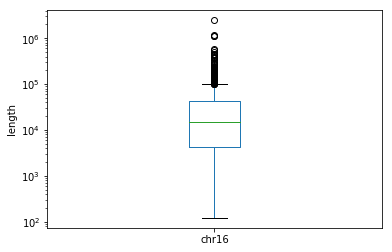

In [38]:
gene_length.plot.box(label="chr16")
plt.yscale('log')
plt.ylabel("length")

基因的长度与基因相对位置之间的关系：

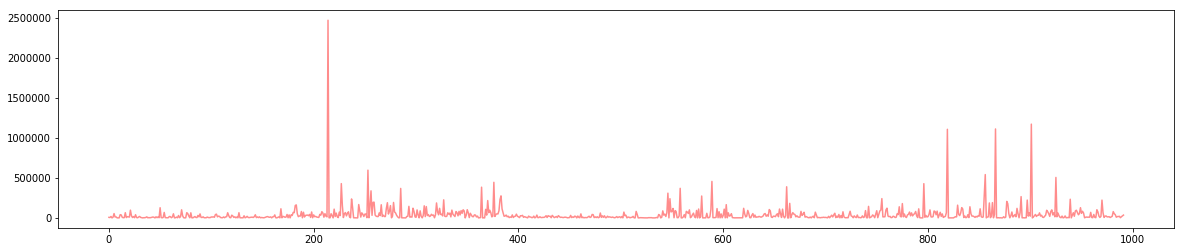

In [33]:
fig, ax = plt.subplots(figsize=(20, 4))
gene_length.plot(color="#ff5c5c", alpha=0.7)

上面是基因长度的一些基本统计信息(min, max, mean, std, ...)

我们还可以按照信息来源对 `df` 进行分组(Group)，查看一下每种来源的基因有多少

In [43]:
df.groupby('source').count()['seqid']

source
ensembl             1
ensembl_havana    799
havana            192
Name: seqid, dtype: int64

还可以使用字符串操作将基因的 `ENSEMBL ID` 从 `Attribute` 列中取出来

In [48]:
ensids = df.attributes.str.extract("gene:(.*);Name")

然后给原来的 df 添加一列新的值：

In [49]:
df['ENSID'] = ensids

In [50]:
df.head(5)

,seqid,source,type,start,end,score,strand,phase,attributes,ENSID
0,16,ensembl_havana,gene,46407,53628,.,-,.,ID=gene:ENSG00000161980;Name=POLR3K;biotype=pr...,ENSG00000161980
1,16,ensembl_havana,gene,53010,57669,.,+,.,ID=gene:ENSG00000161981;Name=SNRNP25;biotype=p...,ENSG00000161981
2,16,ensembl_havana,gene,58059,76355,.,-,.,ID=gene:ENSG00000007384;Name=RHBDF1;biotype=pr...,ENSG00000007384
3,16,havana,gene,74683,74961,.,+,.,ID=gene:ENSG00000278995;Name=Z69720.2;biotype=...,ENSG00000278995
4,16,ensembl_havana,gene,77007,85853,.,+,.,ID=gene:ENSG00000103152;Name=MPG;biotype=prote...,ENSG00000103152
